In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Hp\Downloads\Assignment\ML\music_genre.csv")

In [3]:
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Rayksopp,Rayksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [4]:
#rename column
df.rename(columns={'music_genre':'MusicGenre'},inplace=True)
df.rename(columns={'artist_name':'ArtistName'},inplace=True)
df.rename(columns={'track_name':'TrackName'},inplace=True)
df.rename(columns={'instance_id':'InstanceId'},inplace=True)
df.rename(columns={'duration_ms':'DurationInMinutes'},inplace=True)
df.rename(columns={'obtained_date':'ObtainedDate'},inplace=True)

In [5]:
df.head()

,InstanceId,ArtistName,TrackName,popularity,acousticness,danceability,DurationInMinutes,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,ObtainedDate,valence,MusicGenre
0,32894.0,Rayksopp,Rayksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [6]:
df.shape

(49954, 18)

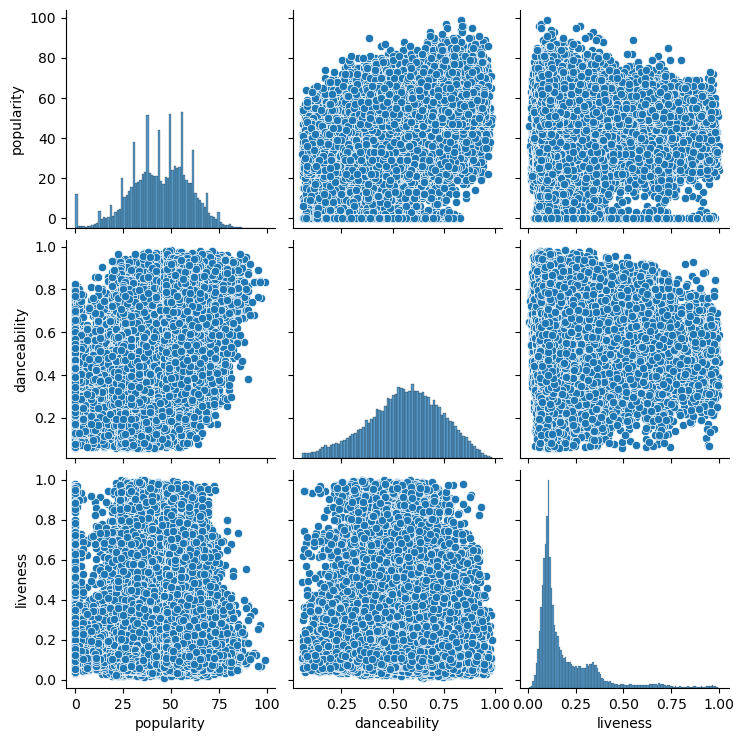

In [7]:
#plot a chart for Age, SpendingScore And Annual Income
sns.pairplot(df[["ArtistName","popularity","danceability", "liveness"]])

In [8]:
# Perform K-means clustering with 5 clusters
from sklearn.cluster import KMeans

In [9]:
df.head()

,InstanceId,ArtistName,TrackName,popularity,acousticness,danceability,DurationInMinutes,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,ObtainedDate,valence,MusicGenre
0,32894.0,Rayksopp,Rayksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [10]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming your DataFrame is named 'df'

# Handle missing values in 'popularity'
df["popularity"].fillna(df["popularity"].median(), inplace=True)

# Handle missing values in 'valence'
df["valence"].fillna(df["valence"].median(), inplace=True)

# Now you can proceed with KMeans on the numerical columns
X = df[["popularity", "valence"]]

# It's often a good practice to scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# You can add the cluster labels back to your original DataFrame if needed
df['Cluster'] = cluster_labels

print("Cluster Centers:")
print(cluster_centers)
print("\nFirst few rows with Cluster labels:")
print(df[['popularity', 'valence', 'Cluster']].head())

C:\Users\Hp\AppData\Local\Temp\ipykernel_14408\1253582234.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["popularity"].fillna(df["popularity"].median(), inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_14408\1253582234.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

Cluster Centers:
[[-0.43763979 -0.97452165]
 [ 0.84605829  0.98512044]
 [-0.6545811   0.90084345]
 [-1.84096891 -0.73851505]
 [ 0.86340777 -0.5260356 ]]

First few rows with Cluster labels:
   popularity  valence  Cluster
0        27.0    0.759        2
1        31.0    0.531        2
2        28.0    0.333        0
3        34.0    0.270        0
4        32.0    0.323        0


In [11]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[["popularity","valence"]])
kmeans.cluster_centers_

array([[15.06571787,  0.3892145 ],
       [57.42932893,  0.4781424 ],
       [33.4013711 ,  0.43925129],
       [69.41228613,  0.49550932],
       [46.72408114,  0.46689006]])

In [13]:
df['Clusters'] = kmeans.labels_
df.head()

,InstanceId,ArtistName,TrackName,popularity,acousticness,danceability,DurationInMinutes,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,ObtainedDate,valence,MusicGenre,Cluster,Clusters
0,32894.0,Rayksopp,Rayksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic,2,2
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic,2,2
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic,0,2
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic,0,2
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic,0,2


In [14]:
df['Clusters'].value_counts()

Clusters
2    15462
4    13359
1    11504
3     4851
0     4778
Name: count, dtype: int64

<Axes: xlabel='valence', ylabel='danceability'>

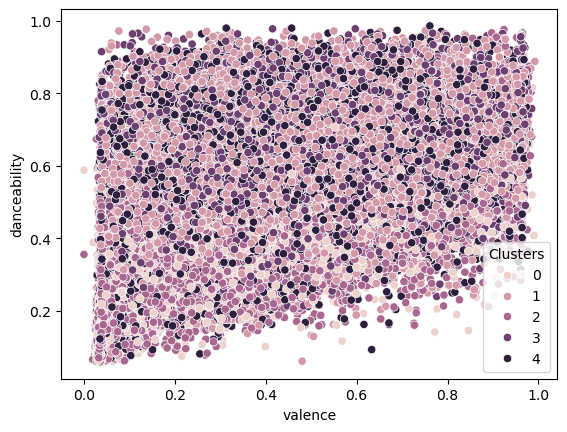

In [15]:
sns.scatterplot(x='valence',y='danceability',hue='Clusters',data=df)

<Axes: xlabel='valence', ylabel='danceability'>

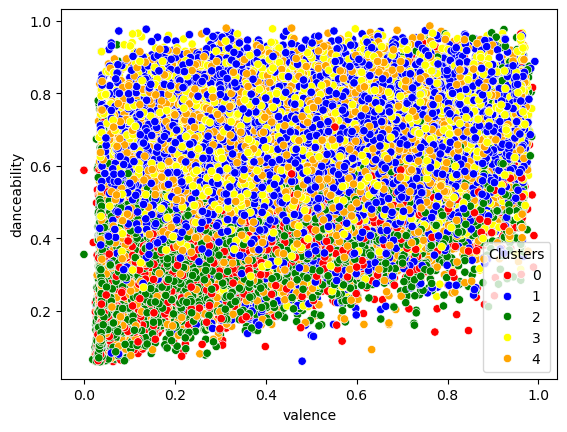

In [16]:
#define the colors
colors ={0:'red',1:'blue',2:'green',3:'yellow',4:'orange'}
sns.scatterplot(x='valence',y='danceability',hue='Clusters',data=df, palette=colors)

In [1]:
#END